In [1]:
pip install -r requirements.txt

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


# Import


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
import seaborn as sns
from plotly.subplots import make_subplots
import pickle
import plotly.graph_objects as go
import plotly.express as px

import charset_normalizer
import fuzzywuzzy
from fuzzywuzzy import process
import os
import re
from dateutil import parser

import warnings

warnings.filterwarnings("ignore")
plt.style.use(
    "https://github.com/dhaitz/matplotlib-stylesheets/raw/master/pitayasmoothie-light.mplstyle"
)

c:\Users\Admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


# Character encoding


In [2]:
df_name = []
encoding = []
path = []

dataset_folder = "dataset"
for file in os.listdir(dataset_folder):
    file_path = os.path.join(dataset_folder, file)
    path.append(file_path)
    # look at the first ten thousand bytes to guess the character encoding
    with open(file_path, "rb") as rawdata:
        result = charset_normalizer.detect(rawdata.read())
        encoding.append(result["encoding"])
    # check what the character encoding might be
    file_name = os.path.splitext(file)[0]
    df_name.append(file_name)
    print(f"{file_name}: {result}")

context: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
mobile_plan_attr: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
mobile_plan_user: {'encoding': 'ascii', 'language': 'English', 'confidence': 1.0}
user: {'encoding': 'utf-8', 'language': 'English', 'confidence': 1.0}


In [3]:
data_source = (tuple(df_name), tuple(encoding), tuple(path))

In [4]:
context = pd.read_csv(data_source[2][0], encoding=data_source[1][0])
context.sample(5)

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
8431,12032,Travel,Family,Sunny,10:00,1,1,0,0,1,0,0
3701,13325,Travel,Alone,S%&unny,9:00,1,1,0,0,1,29,0
2954,9923,Visit,Alone,S~un?ny,10 PM,1,1,1,0,1,0,0
1659,16889,Work,~Alone,&Sunny,7:00,1,0,0,1,0,0,1
6434,2800,Travel,Al%?one,Sun!!ny,8:00,1,0,0,0,1,14,0


In [5]:
mobile_plan_attr = pd.read_csv(
    data_source[2][1], encoding=data_source[1][1], delimiter=";"
)

mobile_plan_attr.sample(5)

,mobile_plan,description,price,duration
1,DATAGOLD,"5GB/ day, high speed",200000,5d
2,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
4,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d
0,DATASILVER,"2GB/ day, high speed",100000,5d
3,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d


In [6]:
mobile_plan_user = pd.read_csv(data_source[2][2], encoding=data_source[1][2])
mobile_plan_user.sample(5)

,id,mobile_plan,accept
41469,3765.0,NaN,0.0
36401,17945.0,DATASILVER,NaN
8091,4448.0,SOCIALMEDIA,0.0
34875,17024.0,SOCIALMEDIAGOLD,0.0
26637,1507.0,SOCIALMEDIA,0.0


In [7]:
user = pd.read_csv(data_source[2][3], encoding=data_source[1][3])
user.sample(5)

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
2262,16946,Theresa Lin,Female,63,NaN,Unemployed,885000000 VND,Ma r r ied_0,ENGLAND,001-275-284-9177x17930,Music therapist,0,0,3,4,0
120,3000,Lauren Robinson,Female,26,Associate,Healthcare Practitioners & Technical,31400$,S i ngle_2,AUSTRALIA,03 9655 7008,"Scientist, forensic",0,3,4,2,0
7710,3686,查海燕,Male,25,NaN,Student,22400$,S in gle_0,CHINA,13999300173,大客户销售,0,0,0,0,0
3004,19168,Mr. Curtis Foley,Male,27,Associate,Management,1140000000 VND,Si ngle_0,ENGLAND,(627)703-3620x377,"Programmer, systems",5,2,8,2,1
11412,2856,Jacqueline Porter,Female,33,Bachelor,Education&Training&Library,860000000 VND,S i ngle_0,ENGLAND,227.916.8252,Personnel officer,0,7,1,4,1


In [8]:
dataset = [context, mobile_plan_attr, mobile_plan_user, user]

# Cleaning

## Missing values check


In [9]:
for x in dataset:
  print('-----------------')
  print(x.isna().sum())

-----------------
id              0
purpose         0
go_with         0
weather         0
time            0
viettel_no_0    0
viettel_no_1    0
viettel_no_2    0
to_hanoi        0
to_other        0
score           0
direction       0
dtype: int64
-----------------
mobile_plan    0
description    0
price          0
duration       0
dtype: int64
-----------------
id                0
mobile_plan    2715
accept         2721
dtype: int64
-----------------
id                      0
name                    0
gender                  0
age                     0
education            4003
profession              0
income                  0
living_with             0
nation                  0
phone                   0
job                     0
fb_freq                 0
yt_freq                 0
insta_freq              0
use_less_than_2GB       0
use_2GB_to_4GB          0
dtype: int64


In [10]:
mobile_plan_user = mobile_plan_user.dropna(subset=['mobile_plan', 'accept'])

## Duplicate


In [11]:
user['id'].duplicated().sum()

0

In [12]:
context['id'].duplicated().sum()

0

In [13]:
mobile_plan_user.sort_values(by='id').head()

,id,mobile_plan,accept
18023,1000.0,SOCIALMEDIA,0.0
18022,1000.0,DATACALL,0.0
18021,1000.0,DATASILVER,0.0
3014,1000.0,DATASILVER,1.0
3087,1001.0,SOCIALMEDIA,1.0


## Context


In [14]:
context.sample(5)

,id,purpose,go_with,weather,time,viettel_no_0,viettel_no_1,viettel_no_2,to_hanoi,to_other,score,direction
2345,4802,Travel,Friend(s),&S~~?unny,18:00,1,1,0,0,1,0,0
9764,10855,Travel,Al&o~ne,!Sunny,4PM,1,0,0,0,1,5,0
10863,14366,Travel,Frie !nd(s),Sunny,8 AM,1,0,0,0,1,0,0
6987,9099,Travel,Family,Sunny,8AM,1,1,0,0,1,9,0
3635,11208,Travel,Fr!? ie nd(s),Sunny,7 PM,1,0,0,0,1,3,0


### Go with and weather


In [15]:
for x in ["go_with", "weather"]:
    # Eliminate special characters and white spaces
    context[x] = context[x].apply(lambda x: re.sub(r"[^a-zA-Z\s]", "", x))

    # Lowercase all words
    context[x] = context[x].str.lower()

    print(context[x].unique())

['alone' 'friends' 'fa mily' 'family' 'fami ly' 'a l one' 'fr iends'
 ' alone' 'a lone' '  alone' ' friends' 'f riends' 'f rie nds' 'frie nds'
 'frien ds' 'f amily' ' family' 'alo ne' 'friend s' 'al one' 'fri ends'
 ' a lone' ' fri ends' 'f riend s' 'alon e' 'frien  ds' ' fri e nds'
 'friends ' 'a  lone' 'fa  mily' 'al  one' '   alone' 'fri e nds'
 ' al one' 'fam ily' '  family' 'f rien ds' '  a lone' ' f amily'
 'frie   nds' 'fri en ds' 'f a mily' ' frie nds' 'f  amily' 'fr  iends'
 ' fa mily' 'famil y' ' fr iends' 'fr ie nds' 'fr ien ds' ' f  amily'
 'fam  ily' ' frien ds' 'frie nd s' 'frie n ds' ' friend s' 'frie  nds'
 'fr i ends' 'fri  ends' 'f ri ends' ' a  lone' ' alo ne' 'friend  s'
 'a   lone' '  friends' '   friends' ' fam ily' 'f r iends' 'alo  ne'
 '  a  lone' ' fa  mily' 'f r  iends' 'f  riends' ' frie  nds' 'fri end s'
 ' fami ly' 'f rie  nds' ' f riends' ' al  one' 'f a  mily' ' fa m ily'
 '    alone' 'f  ri ends' 'a lo ne' 'frien d s' 'f am ily' '  f riends'
 '   family

In [16]:
# List of possible values for the column 'go_with'
choices = ["alone", "friend(s)", "family"]


# Apply the fuzzy matching to the column 'go_with'
def correct_name(name):
    return process.extractOne(name, choices)[0]


context["go_with"] = context["go_with"].apply(correct_name)

### Time


In [17]:
# Eliminate white spaces
context["time"] = context["time"].str.replace(r"\s+", "", regex=True)


# Function to convert time to 24-hour format
def convert_to_24hr_format(time_str):
    # Use dateutil.parser to parse the time string
    return parser.parse(time_str).strftime("%H:%M")


# Apply the function to the column 'time'
context["time"] = context["time"].apply(convert_to_24hr_format)
context["time"] = pd.to_datetime(context["time"], format="%H:%M")

def time_of_day(hour):
    if 5 <= hour < 12:
        return 'morning'
    elif 12 <= hour < 17:
        return 'afternoon'
    elif 17 <= hour < 21:
        return 'evening'
    else:
        return 'night'

context['hour'] = pd.to_datetime(context['time']).dt.hour
context['time_of_day'] = context['hour'].apply(time_of_day)

context = context.drop(columns=['time', 'hour'])

### Purpose


In [18]:
context["purpose"] = context["purpose"].str.strip()
context["purpose"] = context["purpose"].str.lower()

In [19]:
context.purpose.unique()

array(['travel', 'visit', 'work'], dtype=object)

In [20]:
context["purpose"] = context["purpose"].replace('travel', 'visit')

### to_hanoi, to_other, direction


In [21]:
context = context.drop(axis=1, columns=["to_hanoi", "to_other"])

In [22]:
context.sample(5)

,id,purpose,go_with,weather,viettel_no_0,viettel_no_1,viettel_no_2,score,direction,time_of_day
705,7563,visit,alone,sunny,1,0,0,8,0,morning
5852,3564,visit,alone,sunny,1,0,0,0,0,afternoon
10746,4698,visit,friend(s),rainy,1,1,0,0,0,evening
1645,5893,work,alone,sunny,1,0,0,0,0,morning
312,4044,work,alone,sunny,1,1,0,17,0,morning


## User


In [23]:
user.sample(5)

,id,name,gender,age,education,profession,income,living_with,nation,phone,job,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB
4904,3595,前田 学,Other,46,Bachelor,Office & Administrative Support,34900$,D iv orced_1,JAPAN,070-5620-4509,薬剤師,0,1,2,1,3
6490,7060,Alec Silva,Male,27,Bachelor,Unemployed,355000000 VND,S i n gle_0,US,484-265-4772x450,Museum/gallery conservator,1,1,4,2,1
8585,5386,Оксана Никифоровна Зайцева,Female,28,Masters,Legal,41500$,Unm a r ried_0,RUSSIA,+76697887668,Педиатр,1,1,2,0,0
4064,7921,Bryan Mckinney,Male,36,NaN,Construction & Extraction,55400$,S in gle_0,AUSTRALIA,(07).0184.0287,Music tutor,0,0,3,0,0
6116,3708,권서연,Other,21,NaN,Student,245000000 VND,Si ngle_0,KOREA,055-819-8491,고무 및 플라스틱 제품 조립원,0,1,0,1,3


### living_with


In [24]:
# Eliminate white spaces
user["living_with"] = user["living_with"].str.strip()
user["living_with"] = user["living_with"].str.replace(r"\s+", "", regex=True)
user["living_with"] = user["living_with"].str.lower()

### nation


In [25]:
user["nation"] = user["nation"].str.strip()
user["nation"] = user["nation"].str.lower()

user["nation"] = user["nation"].replace("australia", "oceania")
user["nation"] = user["nation"].replace(["brazil", "us"], "americas")
user["nation"] = user["nation"].replace(["denmark", "england", "russia"], "europe")
user["nation"] = user["nation"].replace(["korea", "japan", "china"], "asia")

user = user.rename(columns={"nation": "continent"})

### gender


In [26]:
user["gender"] = user["gender"].str.strip()
user["gender"] = user["gender"].str.lower()

### education


In [27]:
user["education"] = user["education"].str.strip()
user["education"] = user["education"].str.lower()

user["education"] = user["education"].replace("bachelor", "grad")
user["education"] = user["education"].replace(["associate", "highschool"], "undergrad")
user["education"] = user["education"].replace("masters", "postgrad")
user["education"] = user["education"].fillna('unknown')

### income


In [28]:
currency_exchange_rate = 23000

# Function to clean and adjust income values
def clean_income(value):
    if 'VND' in value:
        return int(value.replace('VND', '')) / currency_exchange_rate
    elif '$' in value:
        return int(value.replace('$', ''))
    else:
        return int(value)

# Apply the function to the 'income' column
user['income_dollar'] = user['income'].apply(clean_income)

In [29]:
user['income_level'] = user['income_dollar'].apply(lambda x: 'lower' if x <= 30000 else 'lower-middle' if x > 30000 and x <= 58000 else 'middle' if x > 58000 and x <= 94000 else 'upper-middle' if x > 94000 and x <= 153000 else 'upper' if x > 153000 and x <= 200000 else 'extreme upper')

### profession


In [30]:
user['profession'] = user['profession'].str.lower()

user['profession']= user['profession'].apply(lambda x: "jobs" if x not in ['student', 'retired', 'unemployed'] else x)

### marital status


In [31]:
# Seperate Living_With column into Maritual_Status column and Children column
user[["marital_status", "children"]] = user["living_with"].str.split("_", expand=True)


user["marital_status"] = user["marital_status"].apply(
    lambda x: "relationship" if x == "married" else "single"
)

user = user.drop(axis=1, columns=["living_with"])

### job


In [32]:
# from langdetect import detect

# # Function to check if a text is in English
# def is_english(text):
#     try:
#         return detect(text) == 'en'
#     except:
#         return False

# # Create a new column 'is_english' to check if the job is in English
# user['is_english'] = user['job'].apply(is_english)

# # Calculate the percentage of non-English jobs
# non_english_count = user['is_english'].value_counts().get(False, 0)
# total_count = len(user)
# percentage_non_english = (non_english_count / total_count) * 100

# print(f"Other languages: {percentage_non_english:.2f}%")

=> Drop job column


In [33]:
# user = user.drop(columns=['is_english'])
user = user.drop(columns=['job'])

In [34]:
user

,id,name,gender,age,education,profession,income,continent,phone,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB,income_dollar,income_level,marital_status,children
0,11156,Rachel Gibbs,female,21,unknown,unemployed,39100$,oceania,(08)-8012-7556,0,0,9,8,3,39100.000000,lower-middle,single,2
1,4297,Karen Anderson,other,22,unknown,unemployed,41000$,europe,943-646-5203,0,0,23,7,2,41000.000000,lower-middle,single,2
2,13301,김지원,female,24,unknown,unemployed,44300$,asia,010-4500-9888,0,0,23,5,2,44300.000000,lower-middle,single,1
3,9920,Elisabeth Wähner,female,24,unknown,unemployed,44400$,europe,+49(0) 587406963,0,0,21,7,2,44400.000000,lower-middle,single,1
4,8424,Sra. Maria Luiza Nogueira,female,25,unknown,unemployed,1100000000 VND,americas,(084) 0568 1445,0,0,22,5,3,47826.086957,lower-middle,single,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11567,11602,Austin Barber,male,26,grad,jobs,82000$,europe,001-798-297-3345x825,0,0,3,5,3,82000.000000,middle,single,0
11568,5645,남상철,male,26,grad,jobs,83900$,asia,043-900-0635,0,0,2,4,1,83900.000000,middle,single,0
11569,15477,John Blanchard,male,30,grad,jobs,76600$,americas,230-283-6789x89147,0,0,3,7,3,76600.000000,middle,single,0
11570,8885,Troy Green,male,30,grad,jobs,2087500000 VND,oceania,+61.472.119.694,0,0,2,7,3,90760.869565,middle,single,0


## mobile_plan_attr


In [35]:
mobile_plan_attr.head()

,mobile_plan,description,price,duration
0,DATASILVER,"2GB/ day, high speed",100000,5d
1,DATAGOLD,"5GB/ day, high speed",200000,5d
2,SOCIALMEDIA,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3d
3,SOCIALMEDIAGOLD,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3d
4,DATACALL,"2GB/ day, high speed\n300 mins call for extern...",200000,5d


In [36]:
mobile_plan_attr['mobile_plan'] = mobile_plan_attr['mobile_plan'].str.lower()

In [37]:
mobile_plan_attr['duration'] = mobile_plan_attr['duration'].str.replace('d', '')

In [38]:
mobile_plan_attr['capacity'] = mobile_plan_attr['description'].str.extract(r'(\d+)GB')

In [39]:
mobile_plan_attr.head()

,mobile_plan,description,price,duration,capacity
0,datasilver,"2GB/ day, high speed",100000,5,2
1,datagold,"5GB/ day, high speed",200000,5,5
2,socialmedia,"1GB/ day\nUnlimited for Tik Tok, Facebook, You...",150000,3,1
3,socialmediagold,"3GB/ day, high speed\nUnlimited for Tik Tok, F...",250000,3,3
4,datacall,"2GB/ day, high speed\n300 mins call for extern...",200000,5,2


## mobile_plan_user


In [40]:
mobile_plan_user.head()

,id,mobile_plan,accept
0,11156.0,DATASILVER,1.0
1,4297.0,SOCIALMEDIAGOLD,1.0
2,13301.0,DATASILVER,1.0
3,9920.0,SOCIALMEDIAGOLD,1.0
4,8424.0,DATASILVER,1.0


In [41]:
mobile_plan_user['mobile_plan'] = mobile_plan_user['mobile_plan'].str.lower()

In [42]:
mobile_planes = mobile_plan_user.mobile_plan.unique()

### Mobile plan recommendation


In [43]:
mobile_plan_rec_raw = mobile_plan_user[["id"]]

# Create columns for each item in the mobile_plan_user dataframe
for item in mobile_planes:
    mobile_plan_rec_raw[item] = mobile_plan_user["mobile_plan"].apply(
        lambda x: 1 if x == item else np.nan
    )

# Check rows that have duplicated ID
duplicate_rows = mobile_plan_rec_raw[
    mobile_plan_rec_raw.duplicated(subset=["id"], keep=False)
]
# Sort by ID
duplicate_rows.sort_values("id")

# Fill missing values of each ID group
# In each ID group, each missing value will be replaced by the last valid value forward (ffill), otherwise, by the next valid value backward (bfill).
mobile_plan_rec = duplicate_rows.groupby("id").apply(
    lambda x: x.fillna(method="ffill").fillna(method="bfill")
)
mobile_plan_rec = mobile_plan_rec.drop_duplicates()

mobile_plan_rec = mobile_plan_rec.drop(axis=1, columns="id").reset_index()
mobile_plan_rec = mobile_plan_rec.drop(axis=1, columns="level_1")

mobile_plan_rec = mobile_plan_rec.fillna(0)
mobile_plan_rec

,id,datasilver,socialmediagold,socialmedia,datacall,datagold
0,1000.0,1.0,0.0,1.0,1.0,0.0
1,1001.0,0.0,0.0,1.0,1.0,0.0
2,1005.0,0.0,0.0,1.0,1.0,1.0
3,1006.0,0.0,0.0,1.0,1.0,0.0
4,1008.0,0.0,0.0,1.0,1.0,1.0
...,...,...,...,...,...,...
10107,19992.0,0.0,1.0,1.0,1.0,0.0
10108,19996.0,0.0,1.0,1.0,1.0,1.0
10109,19997.0,1.0,1.0,0.0,0.0,1.0
10110,19998.0,1.0,1.0,1.0,0.0,0.0


### Mobile plan conversion rate


In [44]:
mobile_plan_accept = mobile_plan_user.pivot_table(
index="id", columns="mobile_plan", values="accept", aggfunc="sum", fill_value=0
).reset_index()

# Đảm bảo tất cả các cột trong mobile_planes có mặt trong bảng kết quả cuối cùng
for plan in mobile_planes:
  if plan not in mobile_plan_accept.columns:
    mobile_plan_accept[plan] = 0

# Sắp xếp lại các cột theo thứ tự trong mobile_planes
mobile_plan_accept = mobile_plan_accept[["id"] + list(mobile_planes)]

In [45]:
# Sử dụng pivot_table để tổng hợp dữ liệu
num_rec = mobile_plan_user.pivot_table(
    index="id", columns="mobile_plan", values="mobile_plan", aggfunc="count", fill_value=0
).reset_index()

# Đảm bảo tất cả các cột trong mobile_planes có mặt trong bảng kết quả cuối cùng
for plan in mobile_planes:
    if plan not in num_rec.columns:
        num_rec[plan] = 0

# Sắp xếp lại các cột theo thứ tự trong mobile_planes
num_rec = num_rec[["id"] + list(mobile_planes)]

# Đảm bảo rằng cả hai bảng đều có cùng thứ tự cột
assert list(mobile_plan_accept.columns) == list(num_rec.columns)

# Tạo bảng mobile_plan_cr bằng cách chia mobile_plan_accept cho num_rec
mobile_plan_cr = mobile_plan_accept.copy()

# Tính tỷ lệ chuyển đổi (conversion rate)
for plan in mobile_planes:
    mobile_plan_cr[plan] = mobile_plan_accept[plan] / num_rec[plan]

mobile_plan_cr.fillna(0, inplace=True)

# Hiển thị bảng mobile_plan_cr
mobile_plan_cr

mobile_plan,id,datasilver,socialmediagold,socialmedia,datacall,datagold
0,1000.0,0.5,0.0,0.0,0.0,0.0
1,1001.0,0.0,0.0,0.5,0.0,0.0
2,1002.0,0.0,1.0,0.0,0.0,0.0
3,1004.0,0.0,0.0,0.0,0.0,0.0
4,1005.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
11567,19994.0,0.0,0.0,0.0,0.0,0.0
11568,19996.0,0.0,0.0,0.0,1.0,0.0
11569,19997.0,1.0,0.0,0.0,0.0,0.0
11570,19998.0,0.0,0.0,0.0,0.0,0.0


## Data type check


In [46]:
dataset = [context, mobile_plan_attr, mobile_plan_cr, mobile_plan_rec, user]
for x in dataset:
    print("-------------------------")
    print(x.dtypes)

-------------------------
id               int64
purpose         object
go_with         object
weather         object
viettel_no_0     int64
viettel_no_1     int64
viettel_no_2     int64
score            int64
direction        int64
time_of_day     object
dtype: object
-------------------------
mobile_plan    object
description    object
price           int64
duration       object
capacity       object
dtype: object
-------------------------
mobile_plan
id                 float64
datasilver         float64
socialmediagold    float64
socialmedia        float64
datacall           float64
datagold           float64
dtype: object
-------------------------
id                 float64
datasilver         float64
socialmediagold    float64
socialmedia        float64
datacall           float64
datagold           float64
dtype: object
-------------------------
id                     int64
name                  object
gender                object
age                    int64
education             

In [47]:
mobile_plan_attr.duration = mobile_plan_attr.duration.astype(int)
mobile_plan_attr.capacity = mobile_plan_attr.capacity.astype(int)


mobile_plan_cr.id = mobile_plan_cr.id.astype(int)
mobile_plan_cr.datasilver = mobile_plan_cr.datasilver.astype(float)
mobile_plan_cr.socialmediagold = mobile_plan_cr.socialmediagold.astype(float)
mobile_plan_cr.socialmedia = mobile_plan_cr.socialmedia.astype(float)
mobile_plan_cr.datacall = mobile_plan_cr.datacall.astype(float)
mobile_plan_cr.datagold = mobile_plan_cr.datagold.astype(float)


mobile_plan_rec.id = mobile_plan_rec.id.astype(int)
mobile_plan_rec.datasilver = mobile_plan_rec.datasilver.astype(int)
mobile_plan_rec.socialmediagold = mobile_plan_rec.socialmediagold.astype(int)
mobile_plan_rec.socialmedia = mobile_plan_rec.socialmedia.astype(int)
mobile_plan_rec.datacall = mobile_plan_rec.datacall.astype(int)
mobile_plan_rec.datagold = mobile_plan_rec.datagold.astype(int)


user.children = user.children.astype(int)
user.income_dollar = user.income_dollar.astype(int)

## Merge


In [48]:
df = (
  user.merge(context, on="id", how="left")
  .merge(mobile_plan_rec, on="id", how="left", suffixes=("", "_rec"))
  .merge(mobile_plan_cr, on="id", how="left", suffixes=("", "_cr"))
)

df.isna().sum()

id                       0
name                     0
gender                   0
age                      0
education                0
profession               0
income                   0
continent                0
phone                    0
fb_freq                  0
yt_freq                  0
insta_freq               0
use_less_than_2GB        0
use_2GB_to_4GB           0
income_dollar            0
income_level             0
marital_status           0
children                 0
purpose                  0
go_with                  0
weather                  0
viettel_no_0             0
viettel_no_1             0
viettel_no_2             0
score                    0
direction                0
time_of_day              0
datasilver            1460
socialmediagold       1460
socialmedia           1460
datacall              1460
datagold              1460
datasilver_cr            0
socialmediagold_cr       0
socialmedia_cr           0
datacall_cr              0
datagold_cr              0
d

In [49]:
df = df.dropna()

## Outliers


In [50]:
df.columns

Index(['id', 'name', 'gender', 'age', 'education', 'profession', 'income',
       'continent', 'phone', 'fb_freq', 'yt_freq', 'insta_freq',
       'use_less_than_2GB', 'use_2GB_to_4GB', 'income_dollar', 'income_level',
       'marital_status', 'children', 'purpose', 'go_with', 'weather',
       'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'score', 'direction',
       'time_of_day', 'datasilver', 'socialmediagold', 'socialmedia',
       'datacall', 'datagold', 'datasilver_cr', 'socialmediagold_cr',
       'socialmedia_cr', 'datacall_cr', 'datagold_cr'],
      dtype='object')

In [51]:
to_drop = ['id', 'name', 'phone', 'income', 'phone']

In [52]:
df = df.drop(axis=1, columns=to_drop)

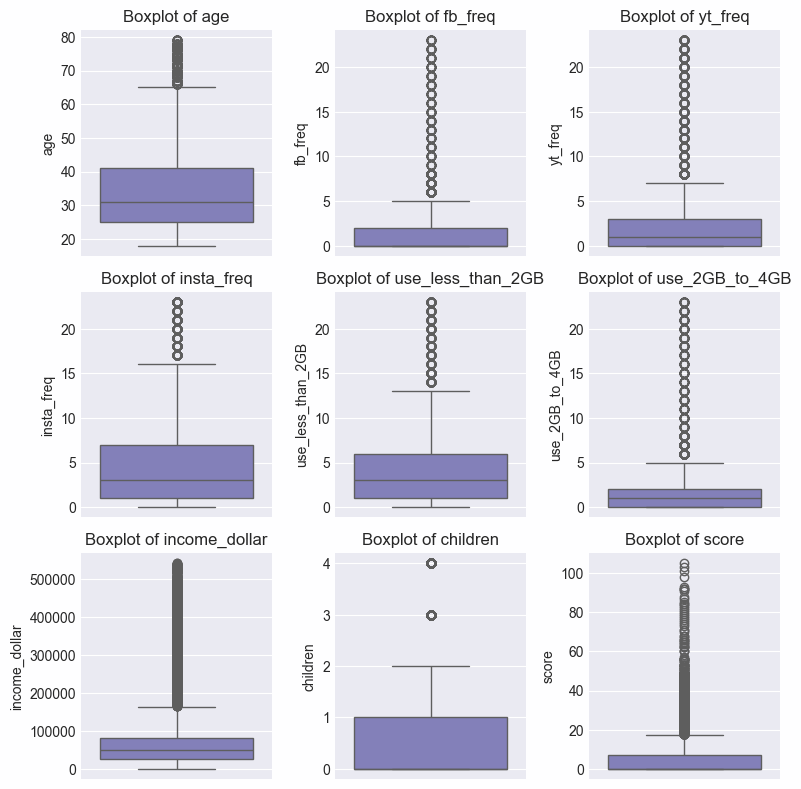

In [53]:
categorical_columns = ['gender', 'education', 'profession', 'continent', 'income_level', 'marital_status', 'purpose', 'go_with', 'weather', 'viettel_no_0', 'viettel_no_1', 'viettel_no_2', 'direction', 'time_of_day', 'datasilver', 'socialmediagold', 'socialmedia', 'datacall', 'datagold']

continuous_columns = df.drop(axis=1, columns=categorical_columns).columns

# Create a canvas with 4 columns and 4 rows
fig, axes = plt.subplots(3, 3, figsize=(8, 8))

# Draw boxplot on the canvas
for i, ax in enumerate(axes.flatten()):
    if i < len(continuous_columns):
        sns.boxplot(y=continuous_columns[i], data=df, ax=ax)
        ax.set_title(f'Boxplot of {continuous_columns[i]}')
        ax.set_ylabel(continuous_columns[i])
    else:
        ax.axis('off')

# Fit layout
plt.tight_layout()

plt.show()

# Feature engineering


In [54]:
df.columns

Index(['gender', 'age', 'education', 'profession', 'continent', 'fb_freq',
       'yt_freq', 'insta_freq', 'use_less_than_2GB', 'use_2GB_to_4GB',
       'income_dollar', 'income_level', 'marital_status', 'children',
       'purpose', 'go_with', 'weather', 'viettel_no_0', 'viettel_no_1',
       'viettel_no_2', 'score', 'direction', 'time_of_day', 'datasilver',
       'socialmediagold', 'socialmedia', 'datacall', 'datagold',
       'datasilver_cr', 'socialmediagold_cr', 'socialmedia_cr', 'datacall_cr',
       'datagold_cr'],
      dtype='object')

## Social media


In [55]:
sm_avg_usage = df[['fb_freq', 'yt_freq', 'insta_freq']].apply(lambda x: x.sum(), axis=1)
sm_avg_usage

df['sm_ext'] = sm_avg_usage.apply(lambda x: 1 if x > 10 else 0)

## use_less_than_2GB and use_2GB_to_4GB


In [56]:
usage = ['use_less_than_2GB', 'use_2GB_to_4GB']

for x in usage:
  range = 1.5
  IQR = df[x].quantile(0.75) - df[x].quantile(0.25)
  upper_bound = df[x].quantile(0.75) + (IQR * range)

  df[f"{x}_ext"] = df[x].apply(lambda y: 1 if y > upper_bound else 0)

## Education


In [57]:
df['education_abn'] = df['education'].apply(lambda x: 1 if x == 'unknown' else 0)

## Score


In [58]:
range = 1.5
IQR = df['score'].quantile(0.75) - df['score'].quantile(0.25)
upper_bound = df['score'].quantile(0.75) + (IQR * range)

df["score_ext"] = df['score'].apply(lambda y: 1 if y > upper_bound else 0)

In [59]:
df.head()

,gender,age,education,profession,continent,fb_freq,yt_freq,insta_freq,use_less_than_2GB,use_2GB_to_4GB,...,datasilver_cr,socialmediagold_cr,socialmedia_cr,datacall_cr,datagold_cr,sm_ext,use_less_than_2GB_ext,use_2GB_to_4GB_ext,education_abn,score_ext
0,female,21,unknown,unemployed,oceania,0,0,9,8,3,...,0.5,0.0,0.0,0.0,0.0,0,0,0,1,0
1,other,22,unknown,unemployed,europe,0,0,23,7,2,...,0.0,0.5,0.0,0.0,0.0,1,0,0,1,0
2,female,24,unknown,unemployed,asia,0,0,23,5,2,...,0.5,0.0,0.0,0.0,0.0,1,0,0,1,0
3,female,24,unknown,unemployed,europe,0,0,21,7,2,...,0.0,1.0,0.0,0.0,0.0,1,0,0,1,1
4,female,25,unknown,unemployed,americas,0,0,22,5,3,...,1.0,0.0,0.0,0.0,0.0,1,0,0,1,0


# EDA

## Univariate


In [60]:
class EDA:
    
    def row(self,data):
        # Display the number of rows and columns in the dataframe
        fig = make_subplots(rows=1, cols=2)
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[0], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🧾 Rows<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
        fig.add_trace(go.Indicator(mode = "number", value = data.shape[1], number={'font':{'color': '#E58F65','size':100}}, title = {"text": "⭕ Columns<br><span style='font-size:0.8em;color:gray'>In the Dataframe</span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
        fig.show()
    
    def border_msg(self,msg, indent=1, width=None, title=None):
        """Print message-box with optional title."""
        lines = msg.split('\n')
        space = " " * indent
        if not width:
            width = max(map(len, lines))
        box = f'╔{"═" * (width + indent * 2)}╗\n'  
        if title:
            box += f'║{space}{title:<{width}}{space}║\n'  
            box += f'║{space}{"-" * len(title):<{width}}{space}║\n'  
        box += ''.join([f'║{space}{line:<{width}}{space}║\n' for line in lines])
        box += f'╚{"═" * (width + indent * 2)}╝' 
        print('\033[92m'+'\033[1m')
        print(box)
        
    def distribution(self,x,title):
        # Plot the distribution of a numerical column
        plt.figure(figsize=(10,8))
        ax = sns.distplot(x, kde=False,bins=30)
        values = np.array([rec.get_height() for rec in ax.patches])
        norm = plt.Normalize(values.min(), values.max())
        colors = plt.cm.jet(norm(values))
        for rec, col in zip(ax.patches,colors):
            rec.set_color(col)
        plt.title(title, size=20, color='black')
        
    def run(self,df):
        
        self.row(df)
        if len(df)>0:
            
            object_df = df.select_dtypes('object').columns.tolist()
            int_df = df.select_dtypes('int').columns.tolist()
            bool_df = df.select_dtypes('bool').columns.tolist()
            float_df = df.select_dtypes('float').columns.tolist()

            if len(object_df)>0:
                
                print( '\033[1m'+"OBJECT TYPE")
                for col in object_df:
                    # Display information about object type columns
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('There are {} unique values in {} column'.format(df[col].nunique(),col.upper()))
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(int_df)>0:
                
                print('\033[1m'+"INT TYPE")
                for col in int_df:
                    # Display information about integer type columns
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    self.border_msg('Average value is : {}'.format(df[col].mean()))
                    self.border_msg('Minumum value is : {}'.format(df[col].min()))
                    self.border_msg('Maximum value is : {}'.format(df[col].max()))
                    self.distribution(df[col],title=col)
                    if df[col].mean()>df[col].std():
                        print(self.border_msg("Normal distributed Data Located below mean"))
                        
                    elif df[col].mean()<df[col].std():
                        print(self.border_msg("Normal distributed Data Located above mean"))
                    else:
                        self.border_msg("Mean Equals Std Dev - Distribution is normal")
                        
                    fig = make_subplots(rows=1, cols=2)
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].mean(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "📌 Mean<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0, 0.5], 'y': [0.6, 1]}))
                    fig.add_trace(go.Indicator(mode = "number", value = df[col].std(), number={'font':{'color': '#E58F65','size':100}}, title = {"text": "🖇 Standart dev<br><span style='font-size:0.8em;color:gray'></span>"}, domain = {'x': [0.5, 1], 'y': [0, 0.4]}))
                    fig.show()
                    plt.show()
                 

            if len(bool_df)>0:
                
                print('\033[1m'+"BOOL TYPE")
                for col in bool_df:
                    # Display information about boolean type columns
                    self.border_msg(' '*25+ col.upper() + ' '*25)
                    plt.figure(figsize=(10,5))
                    sns.countplot(y = col, data = df,
                                  order = df[col].value_counts().index)
                    plt.show()
                    
            if len(float_df)>0:
                
                print('\033[1m'+"FLOAT TYPE")
                for col in float_df:
                    # Display information about float type columns
                    for col in int_df:
                        self.distribution(df[col],title=col)
                        if df[col].mean()>df[col].std():
                            print(self.border_msg("Normal distributed Data Located below mean"))
                        
                        elif df[col].mean()<df[col].std():
                            print(self.border_msg("Normal distributed Data Located above mean"))
                        else:
                            self.border_msg("Mean Equals Std Dev - Distribution is normal")

In [61]:
# frame = EDA().run(df)

# Feature selection


In [62]:
labels = ['datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall']

## Chi square test for categorical columns


In [63]:
cat_col = [col for col in categorical_columns if col not in labels]

In [64]:
from scipy.stats import chi2_contingency

# Initialize an empty list to store results
chi_sq_test = []

# Loop through each label and each categorical column
for x in labels:
    for col in cat_col:
        # Create contingency table
        contingency_table = pd.crosstab(df[x], df[col])

        # Perform chi-squared test
        chi2, p, dof, ex = chi2_contingency(contingency_table)

        # Append results to the list
        chi_sq_test.append({
            'Label': x,
            'Categorical Column': col,
            'Chi-squared': chi2,
            'P-value': p,
            'Significant (P < 0.05)': p < 0.05
        })

# Create a DataFrame from the results list
chi_sq_test = pd.DataFrame(chi_sq_test)

# Display the results
chi_sq_test

,Label,Categorical Column,Chi-squared,P-value,Significant (P < 0.05)
0,datasilver,gender,6.793685,3.347882e-02,True
1,datasilver,education,0.538307,9.103984e-01,False
2,datasilver,profession,2.845420,4.160775e-01,False
3,datasilver,continent,6.741334,8.061564e-02,False
4,datasilver,income_level,15.304984,9.135661e-03,True
...,...,...,...,...,...
65,datacall,viettel_no_0,0.000000,1.000000e+00,False
66,datacall,viettel_no_1,17.234763,3.303362e-05,True
67,datacall,viettel_no_2,34.312486,4.693608e-09,True
68,datacall,direction,0.880355,3.481043e-01,False


In [65]:
chi_sq_test[chi_sq_test['Significant (P < 0.05)'] == True]['Categorical Column'].unique()

array(['gender', 'income_level', 'purpose', 'go_with', 'viettel_no_1',
       'direction', 'time_of_day', 'viettel_no_2', 'weather'],
      dtype=object)

In [66]:
chi_sq_test[chi_sq_test['Significant (P < 0.05)'] == False]['Categorical Column'].unique()

array(['education', 'profession', 'continent', 'marital_status',
       'weather', 'viettel_no_0', 'viettel_no_2', 'gender',
       'income_level', 'purpose', 'viettel_no_1', 'direction', 'go_with',
       'time_of_day'], dtype=object)

## T test for continuous columns


In [67]:
from scipy import stats

# Khởi tạo một list rỗng để lưu các kết quả
point_biserial = []

# Tính toán và lưu kết quả vào list
for label in labels:
    for col in continuous_columns:
        r, p_value = stats.pointbiserialr(df[label], df[col])
        point_biserial.append((label, col, r, p_value))

# Tạo DataFrame từ list kết quả
point_biserial = pd.DataFrame(point_biserial, columns=['Label', 'Continuous Column', 'Point-Biserial Correlation', 'p-value'])

# Thêm cột thỏa điều kiện p-value < 0.05
point_biserial['Significant (P < 0.05)'] = point_biserial['p-value'] < 0.05
point_biserial

,Label,Continuous Column,Point-Biserial Correlation,p-value,Significant (P < 0.05)
0,datasilver,age,0.000327,9.737694e-01,False
1,datasilver,fb_freq,-0.004897,6.224368e-01,False
2,datasilver,yt_freq,-0.007640,4.423834e-01,False
3,datasilver,insta_freq,-0.006188,5.337979e-01,False
4,datasilver,use_less_than_2GB,-0.008140,4.130845e-01,False
...,...,...,...,...,...
65,datacall,datasilver_cr,-0.056058,1.692112e-08,True
66,datacall,socialmediagold_cr,-0.062939,2.379892e-10,True
67,datacall,socialmedia_cr,-0.045174,5.509274e-06,True
68,datacall,datacall_cr,0.237665,7.571741e-130,True


In [68]:
point_biserial[point_biserial['Significant (P < 0.05)'] == True]['Continuous Column'].unique()

array(['datasilver_cr', 'socialmediagold_cr', 'socialmedia_cr',
       'datacall_cr', 'datagold_cr', 'age'], dtype=object)

In [69]:
point_biserial[point_biserial['Significant (P < 0.05)'] == False]['Continuous Column'].unique()

array(['age', 'fb_freq', 'yt_freq', 'insta_freq', 'use_less_than_2GB',
       'use_2GB_to_4GB', 'income_dollar', 'children', 'score',
       'datacall_cr'], dtype=object)

# model


In [71]:
import joblib
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, hamming_loss
from sklearn.pipeline import Pipeline

In [72]:
# Set random seed
seed = 42

# Initialize classifiers
models = {
    'Random Forest Classifier': RandomForestClassifier(random_state=seed),
    'Gradient Boosting Classifier': GradientBoostingClassifier(random_state=seed),
    'AdaBoost Classifier': AdaBoostClassifier(random_state=seed),
    'XGBoost Classifier': XGBClassifier(random_state=seed)
}

# Initialize KFold
kf = KFold(n_splits=5, shuffle=True, random_state=seed)

# Prepare to collect results
results = []

# Initialize LabelEncoder dictionary
label_dict = {
    'labels': ['datasilver', 'datagold', 'socialmedia', 'socialmediagold', 'datacall'],
    'cr': ['datasilver_cr', 'datagold_cr', 'socialmedia_cr', 'socialmediagold_cr', 'datacall_cr']
}

In [73]:
# Iterate through each label in label_dict['labels']
for i, x in enumerate(label_dict['labels']):
    print(f"Training model for label {x}...")

    current_value = label_dict['cr'][i]
    other = [value for value in label_dict['cr'] if value != current_value]
    features = df.drop(axis=1, columns=label_dict['labels'] + other)

    X = features
    y = df[x]

    # Encode categorical columns
    check = (X.dtypes == 'object') | (X.dtypes == 'category')
    object_columns = list(check[check].index)

    preprocessor = ColumnTransformer(
        transformers=[
            ('num', StandardScaler(), X.columns.difference(object_columns)),
            ('cat', OneHotEncoder(), object_columns)
        ],
        remainder='passthrough'
    )

    model_results = []
    best_model = None
    best_accuracy = 0

    for name, model in models.items():
        accuracy_cv_scores = []
        hamming_cv_losses = []
        precision_scores = []
        recall_scores = []
        f1_scores = []

        # Train the model using KFold
        for train_index, test_index in kf.split(X):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]

            pipeline = Pipeline(steps=[
                ('preprocessor', preprocessor),
                ('classifier', model)
            ])

            pipeline.fit(X_train, y_train)
            y_pred = pipeline.predict(X_test)

            # Metrics
            acc = accuracy_score(y_test, y_pred)
            hamming = hamming_loss(y_test, y_pred)
            precision = precision_score(y_test, y_pred, average='micro')
            recall = recall_score(y_test, y_pred, average='micro')
            f1 = f1_score(y_test, y_pred, average='micro')

            accuracy_cv_scores.append(acc)
            hamming_cv_losses.append(hamming)
            precision_scores.append(precision)
            recall_scores.append(recall)
            f1_scores.append(f1)

        # Calculate the mean of each metric
        mean_accuracy = np.mean(accuracy_cv_scores)
        mean_hamming_loss = np.mean(hamming_cv_losses)
        mean_precision = np.mean(precision_scores)
        mean_recall = np.mean(recall_scores)
        mean_f1_score = np.mean(f1_scores)

        # Save model results
        model_results.append({
            'Model': name,
            'Mean Accuracy': mean_accuracy,
            'Mean Hamming Loss': mean_hamming_loss,
            'Mean Precision': mean_precision,
            'Mean Recall': mean_recall,
            'Mean F1-score': mean_f1_score
        })

        # Update the best model if current model is better
        if mean_accuracy > best_accuracy:
            best_accuracy = mean_accuracy
            best_model = pipeline

    # Save the best model for the current label
    joblib.dump(best_model, f'best_model_{x}.pkl')

    # Convert results to DataFrame and sort by Mean Accuracy
    model_results_df = pd.DataFrame(model_results)
    model_results_df = model_results_df.sort_values(by='Mean Accuracy', ascending=False)

    # Keep top 3 models
    top_3_models = model_results_df.head(3)

    # Print top 3 models and their metrics
    print(f"Top 3 models for label {x}:")
    print(top_3_models)
    print("*" * 50)

    # Add label information and append to results
    top_3_models['Label'] = x
    results.append(top_3_models)

# Concatenate all results
final_results = pd.concat(results, ignore_index=True)

Training model for label datasilver...
Top 3 models for label datasilver:
                          Model  Mean Accuracy  Mean Hamming Loss  \
4                           SVC       0.601067           0.398933   
1  Gradient Boosting Classifier       0.592861           0.407139   
0      Random Forest Classifier       0.592267           0.407733   

   Mean Precision  Mean Recall  Mean F1-score  
4        0.601067     0.601067       0.601067  
1        0.592861     0.592861       0.592861  
0        0.592267     0.592267       0.592267  
**************************************************
Training model for label datagold...
Top 3 models for label datagold:
                          Model  Mean Accuracy  Mean Hamming Loss  \
4                           SVC       0.558643           0.441357   
1  Gradient Boosting Classifier       0.555182           0.444818   
5         KNeighbors Classifier       0.551423           0.448577   

   Mean Precision  Mean Recall  Mean F1-score  
4        0.

In [74]:
final_results

,Model,Mean Accuracy,Mean Hamming Loss,Mean Precision,Mean Recall,Mean F1-score,Label
0,SVC,0.601067,0.398933,0.601067,0.601067,0.601067,datasilver
1,Gradient Boosting Classifier,0.592861,0.407139,0.592861,0.592861,0.592861,datasilver
2,Random Forest Classifier,0.592267,0.407733,0.592267,0.592267,0.592267,datasilver
3,SVC,0.558643,0.441357,0.558643,0.558643,0.558643,datagold
4,Gradient Boosting Classifier,0.555182,0.444818,0.555182,0.555182,0.555182,datagold
5,KNeighbors Classifier,0.551423,0.448577,0.551423,0.551423,0.551423,datagold
6,Gradient Boosting Classifier,0.650711,0.349289,0.650711,0.650711,0.650711,socialmedia
7,SVC,0.647843,0.352157,0.647843,0.647843,0.647843,socialmedia
8,Logistic Regression,0.646063,0.353937,0.646063,0.646063,0.646063,socialmedia
9,Random Forest Classifier,0.586036,0.413964,0.586036,0.586036,0.586036,socialmediagold


In [75]:
view = pd.merge(final_results.groupby('Label').max('Mean Accuracy'), final_results[['Label', 'Model', 'Mean Accuracy']], on=['Label', 'Mean Accuracy'], how='inner')
view

,Label,Mean Accuracy,Mean Hamming Loss,Mean Precision,Mean Recall,Mean F1-score,Model
0,datacall,0.574366,0.431372,0.574366,0.574366,0.574366,SVC
1,datagold,0.558643,0.448577,0.558643,0.558643,0.558643,SVC
2,datasilver,0.601067,0.407733,0.601067,0.601067,0.601067,SVC
3,socialmedia,0.650711,0.353937,0.650711,0.650711,0.650711,Gradient Boosting Classifier
4,socialmediagold,0.586036,0.423258,0.586036,0.586036,0.586036,Random Forest Classifier


---
